In [126]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models , layers
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D,MaxPooling2D,Dropout,Activation, Dense, Flatten

In [127]:
train_dir = "training_set"
test_dir = "test_set"

In [128]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [129]:
train_datagen = ImageDataGenerator(rescale=1./255 , zoom_range=0.2 , horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [130]:
training_data = train_datagen.flow_from_directory(train_dir , target_size=(300 , 300) , batch_size=16 , class_mode='binary')

Found 3577 images belonging to 2 classes.


In [131]:
test_data = test_datagen.flow_from_directory(test_dir, target_size=(300, 300) , batch_size=16, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [132]:
cnn = tf.keras.models.Sequential()

In [133]:
cnn.add(Conv2D(32 , (3 ,3 ) , input_shape=(300 , 300 , 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [134]:
cnn.add(Conv2D(32 , (3 , 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [135]:
cnn.add(Conv2D(32 , (3 ,3 )))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [136]:
cnn.add(Flatten())

In [137]:
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.8))
cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))
cnn.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [138]:
batch_size = 16

In [139]:
hist = cnn.fit_generator(
    training_data,
    steps_per_epoch=200 // batch_size,
    epochs=25,
    validation_data=test_data,
    validation_steps= 80 // batch_size
)
hist

Epoch 1/25
12/12 [==============================] - 17s 1s/step - loss: 0.9071 - accuracy: 0.7708 - val_loss: 1.1604 - val_accuracy: 0.4500

In [140]:
prediction = cnn.predict(test_data)
prediction

array([[0.15097836],
       [0.28004697],
       [0.3276    ],
       ...,
       [0.35685027],
       [0.04611671],
       [0.26644695]], dtype=float32)

In [141]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
activation_35 (Activation)   (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_36 (Activation)   (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 71, 71, 32)       

No handles with labels found to put in legend.


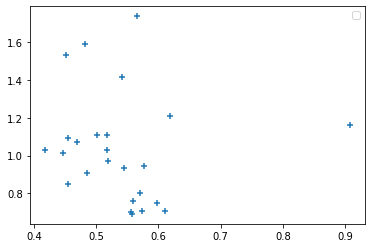

In [157]:
plt.scatter(hist.history['loss'] , hist.history['val_loss'], cmap='green' , marker='+')
plt.legend()
plt.show()

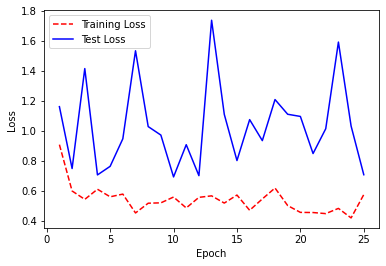

In [162]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

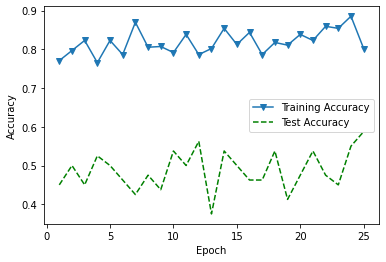

In [166]:
training_accuracy = hist.history['accuracy']
test_accuracy = hist.history['val_accuracy']
epoch_count_accuracy = range(1 , len(training_accuracy) +1)
plt.plot(epoch_count_accuracy , training_accuracy , 'v-')
plt.plot(epoch_count_accuracy , test_accuracy,  'g--')
plt.legend(['Training Accuracy' , 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()